In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import NonlinearConstraint

In [2]:
import nlopt

In [3]:
from truss import Node, Bar, Truss

In [4]:
n00 = Node(0,0.25,freex=False, freey=False)
n01 = Node(1,0.25, freey=False)
n11 = Node(0.5,0.5)
n11.apply_load(0, -10**3)

In [5]:
xpos = np.linspace(-0.1, 1.1, num=4)
ypos = np.linspace(-0.1, 1.1, num=4)

In [6]:
xpos

array([-0.1,  0.3,  0.7,  1.1])

In [38]:
nodes = [n00, n01, n11]
for x in xpos:
    for y in ypos:
        #nodes.append(Node(x+np.random.uniform(-0.05, 0.05), y+np.random.uniform(-0.05, 0.05)))
        nodes.append(Node(x, y))

In [39]:
gridTruss = Truss.from_delaunay(nodes)
gridTruss.set_all_widths(0.01)

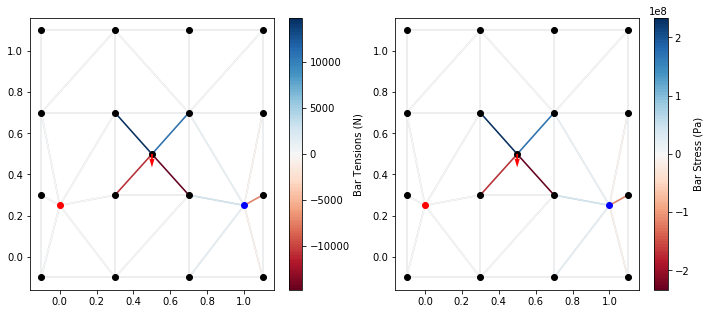

In [40]:
gridTruss.plot()

In [41]:
gridTruss.solve()

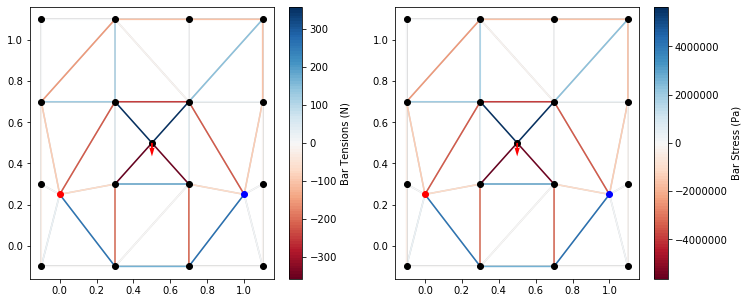

In [42]:
gridTruss.plot()

In [43]:
gridTruss.mass()

2.8597141390472562

In [44]:
gridTruss.details()

/Users/Devansh/Documents/GitHub/AVD_Initial_Sizing/Detailed_Design/truss.py:432: RuntimeWarning: divide by zero encountered in double_scalars
  bar_deets = [[i, b.node0, b.node1, b.E/10**9, b.yield_strength/10**6, b.w*1000, b.t*1000, b.area()*10**6, b.I()*10**12, b.length(), b.mass(), b.buckling_load(), b.tension(), b.extension()*1000, b.stress()/10**6, b.strain(), b.qBuckle(), b.qYield(), -min(b.buckling_load()/b.tension(), 0), b.yield_strength/b.stress()] for i, b in enumerate(self.bars)]


(    ID  x (m)  y (m)  Free x?  Free y?  Force x (N)  Force y (N)  \
 0    0   -0.1   1.10     True     True            0            0   
 1    1    0.3   1.10     True     True            0            0   
 2    2    0.7   1.10     True     True            0            0   
 3    3    0.3  -0.10     True     True            0            0   
 4    4   -0.1  -0.10     True     True            0            0   
 5    5    0.0   0.25    False    False            0            0   
 6    6   -0.1   0.30     True     True            0            0   
 7    7   -0.1   0.70     True     True            0            0   
 8    8    0.3   0.30     True     True            0            0   
 9    9    0.3   0.70     True     True            0            0   
 10  10    0.7  -0.10     True     True            0            0   
 11  11    0.7   0.30     True     True            0            0   
 12  12    0.7   0.70     True     True            0            0   
 13  13    1.1   0.70     True    

In [120]:
algo = nlopt.LD_SLSQP
n = len(gridTruss.bars)
opt = nlopt.opt(algo, n)

In [121]:
opt

<nlopt.opt; proxy of <Swig Object of type 'nlopt::opt *' at 0x125514900> >

In [122]:
def f(x, grad):
    if grad.size > 0:
        pass
    
    gridTruss.set_widths(x)
    
    return gridTruss.mass()


opt.set_min_objective(f)

In [123]:
opt.set_lower_bounds(0.1e-3)
opt.set_upper_bounds(100e-3)

array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001])

In [125]:
def c(result, x, grad):
    
    gridTruss.set_widths(x)
    
    gridTruss.solve()
    
    r = [+ b.tension() - b.buckling_load() for b in gridTruss.bars]
    
    for i, rr in enumerate(r):
        result[i] = rr
    
opt.add_inequality_mconstraint(c, np.zeros(n))
#opt.add_equality_constraint(h, tol=0)

In [126]:
#opt.set_ftol_rel(0.01)
opt.set_maxtime(60)

In [127]:
x0 = [0.01 for b in gridTruss.bars]
xopt = opt.optimize(x0)

In [128]:
xopt

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [129]:
xopt

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [130]:
gridTruss.set_widths(xopt)
gridTruss.solve()
gridTruss.mass()

2.8597141390472562

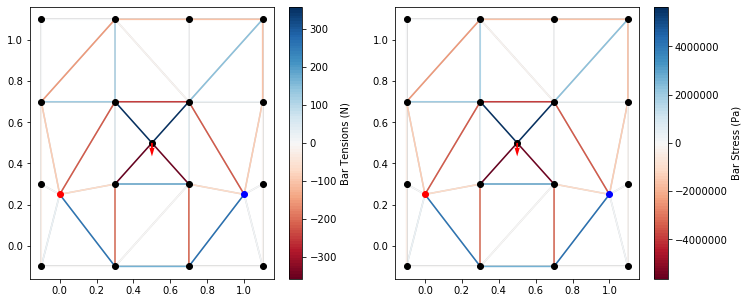

In [131]:
gridTruss.plot()

In [132]:
df_n, df_b = gridTruss.details()

In [133]:
df_b

,ID,Node 0,Node 1,E (GPa),Yield (MPa),w (mm),t (mm),A (mm2),I (mm4),L (m),m (kg),Buckling Load (N),T (N),ext (mm),Stress (MPa),Strain,Will buckle?,Will yield?,Buckle Margin,Yield Margin
0,0,"N(0.30, 1.10)","N(0.70, 1.10)",71.0,300.0,10.0,6.35,63.5,213.373229,0.400000,0.068580,934.497279,-1.039380e+02,-9.221512e-03,-1.636818e+00,-2.305378e-05,False,False,8.990913,-1.832824e+02
1,1,"N(1.00, 0.25)","N(1.10, -0.10)",71.0,300.0,10.0,6.35,63.5,213.373229,0.364005,0.062409,1128.449545,1.405078e+01,1.134427e-03,2.212722e-01,3.116509e-06,False,False,0.000000,1.355796e+03
2,2,"N(1.10, -0.10)","N(1.10, 0.30)",71.0,300.0,10.0,6.35,63.5,213.373229,0.400000,0.068580,934.497279,-1.351016e+01,-1.198639e-03,-2.127585e-01,-2.996598e-06,False,False,69.169943,-1.410049e+03
3,3,"N(0.30, 0.30)","N(0.70, 0.30)",71.0,300.0,10.0,6.35,63.5,213.373229,0.400000,0.068580,934.497279,1.833967e+02,1.627119e-02,2.888137e+00,4.067799e-05,False,False,0.000000,1.038732e+02
4,4,"N(0.70, 0.70)","N(1.10, 1.10)",71.0,300.0,10.0,6.35,63.5,213.373229,0.565685,0.096987,467.248640,1.469905e+02,1.844302e-02,2.314811e+00,3.260297e-05,False,False,0.000000,1.296002e+02
5,5,"N(1.00, 0.25)","N(0.70, -0.10)",71.0,300.0,10.0,6.35,63.5,213.373229,0.460977,0.079035,703.621481,2.658376e+02,2.718090e-02,4.186419e+00,5.896364e-05,False,False,0.000000,7.166030e+01
6,6,"N(0.70, -0.10)","N(0.70, 0.30)",71.0,300.0,10.0,6.35,63.5,213.373229,0.400000,0.068580,934.497279,-2.018389e+02,-1.790741e-02,-3.178566e+00,-4.476853e-05,False,False,4.629916,-9.438219e+01
7,7,"N(0.00, 0.25)","N(0.30, 0.30)",71.0,300.0,10.0,6.35,63.5,213.373229,0.304138,0.052144,1616.427726,-6.639902e+01,-4.479200e-03,-1.045654e+00,-1.472752e-05,False,False,24.344151,-2.869018e+02
8,8,"N(0.00, 0.25)","N(-0.10, -0.10)",71.0,300.0,10.0,6.35,63.5,213.373229,0.364005,0.062409,1128.449545,2.231917e+01,1.801997e-03,3.514831e-01,4.950466e-06,False,False,0.000000,8.535262e+02
9,9,"N(0.00, 0.25)","N(0.30, 0.70)",71.0,300.0,10.0,6.35,63.5,213.373229,0.540833,0.092726,511.177999,-2.157563e+02,-2.588179e-02,-3.397737e+00,-4.785546e-05,False,False,2.369238,-8.829405e+01


In [134]:
df_b[['w (mm)', 'Buckling Load (N)', 'T (N)','Will buckle?']]

,w (mm),Buckling Load (N),T (N),Will buckle?
0,10.0,934.497279,-1.039380e+02,False
1,10.0,1128.449545,1.405078e+01,False
2,10.0,934.497279,-1.351016e+01,False
3,10.0,934.497279,1.833967e+02,False
4,10.0,467.248640,1.469905e+02,False
5,10.0,703.621481,2.658376e+02,False
6,10.0,934.497279,-2.018389e+02,False
7,10.0,1616.427726,-6.639902e+01,False
8,10.0,1128.449545,2.231917e+01,False
9,10.0,511.177999,-2.157563e+02,False
